# Tutorial 3.3. Response of SDoF/MDoF - Class Implementation  

### Description: The previous examples (tutorials 3.1 and 3.2) are presented in a class implementation as Version 2. Please check the Version2.zip 


Project: Structural Wind Engineering WS18-19 
        Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek
        
Author: kodakkal.anoop@tum.de mate.pentek@tum.de

Created on:  15.11.2018

Last update: 15.11.2018

##### Contents

1. Structural response of a SDoF system under dynamic loads
2. Structural response of a MDoF modeled as shear beam under dynamic loads
3. Structural response of a MDoF modeled with Euler-Bernoulli beam theory under dynamic loads


## SDoF model

##### List of input files 

1. cosim_sdof_parameters.json: defines the solver and the time parameters of the dynamic analysis 
2. ProjectParametersSDoF.json: defines the system properties of the SDoF, initial conditions and the time integration scheme parameters

these inputs are similar to the co-simulation solver in [Kratos](https://github.com/KratosMultiphysics/Kratos/tree/empire/solver-stage-fsi/applications/EmpireApplication) 

##### List of auxilaary files 
1. co_simulation_base_solver.py: The base class for the solver 
2. mdof_solver.py: MDoF class 
3. custom_files.py: custom functionalities 
4. analysis_type.py: various analysis types (Static, Eigen value, Dynamic) are available
4. load_type.py: various external load type (Constant, Sinusoidal, Random and Superimposed)are available
5. visualize_resuly_utilities.py: Various visualization functionalities (plot, animations) available 


##### List of Solver_models
1. mdof_base_model.py: The base class for the solver model 
2. mdof_sdof_model.py: The SDoF model
3. mdof_generic_model.py: Generic MDoF model with given mass, stiffness and damping matrix
4. mdof_cantilever_shear_2d_model.py: Cantilever shear model 
5. mdof_cantilever_eb_beam_2d_model.py: Cantilever Euler-Bernoulli beam

##### List of Time Integration Schemes
1. time_integration_base_scheme.py: The base class for time integration scheme 
2. time_integration_backward_euler12_scheme.py: Backward Euler scheme
2. time_integration_forward_euler12_scheme.py: Forward Euler scheme
3. time_integration_generalized_alpha_scheme.py: Generalized alpha scheme

#### execute run_sdof.py with Visual Studio Code and observe the results


In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

from source.analysis_type import*
from source.load_type import*
from source.custom_files import *
from source.mdof_solver import *

#### SDoF system parameters


In [2]:
# =========================sdof system properties==========================  
parameter_file = open('cosim_sdof_parameters.json','r')
Parameters = json.loads(parameter_file.read())
solver_settings = Parameters['solver_settings']
sdof_solver = MDoFSolver(solver_settings,1)

#### Static analysis

No handles with labels found to put in legend.


Solving for ext_force in StaticAnalysis derived class 

Plotting result in StaticAnalysis 



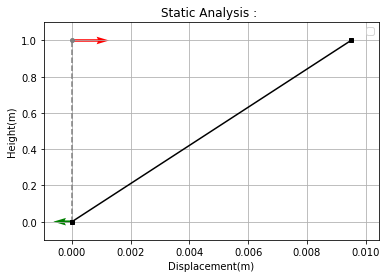

In [3]:
#========================= static analysis==========================  
force_static = np.array([1.5]) # external static force acting on the system
static_analysis = StaticAnalysis(sdof_solver.model)
static_analysis.solve(force_static)
static_analysis.plot_solve_result()

#### Eigenvalue analysis

No handles with labels found to put in legend.


Generalized mass should be identity

Plotting result for a selected eigenmode in EigenvalueAnalysis 



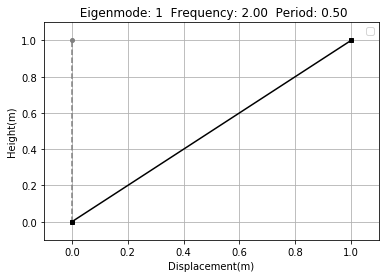

4
Animating eigenmode in EigenvalueAnalysis 



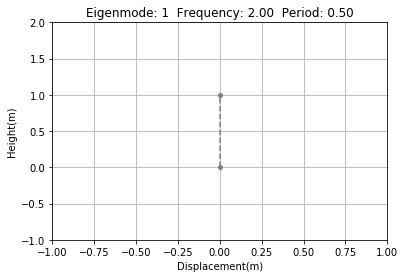

In [4]:
#========================= eigenvalue analysis ==========================  
eigenvalue_analysis = EigenvalueAnalysis(sdof_solver.model)
eigenvalue_analysis.solve()
eigenvalue_analysis.plot_selected_eigenmode(1)
eigenvalue_analysis.animate_selected_eigenmode(1)



#### Dynamic analysis

No handles with labels found to put in legend.


Force:  1
Solving the structure for dynamic loads 

Plotting result for a selected time step in DynamicAnalysis 



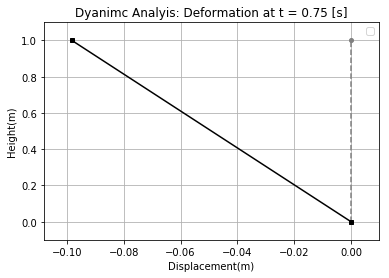

Animating time history in DynamicAnalysis 



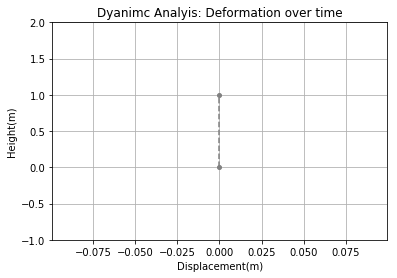

In [5]:
#========================= dynamic analysis ==========================  

# time parameters 
time_parameters = Parameters["problem_data"]
start_time = time_parameters["start_time"]
end_time = time_parameters["end_time"]
dt = time_parameters["time_step"]
array_time = np.arange (start_time,end_time + dt, dt)

# dynamic forces
"""
Choose from "signalSin", "signalRand", "signalConst", "signalSuperposed" or 
for free vibration choose "signalNone" 
"""
# external dynamic force acting on the system
freq = 10
force_dynamic = load_type("signalSin", array_time, 1, freq, force_static) 

dynamic_analysis = DynamicAnalysis(sdof_solver, force_dynamic, time_parameters) 
dynamic_analysis.solve()
dynamic_analysis.plot_selected_time_step(0.75)
dynamic_analysis.animate_time_history()

### Exercise 1: Execute the run_mdof_***.py-s for generic model,  shear model and Euler Bernoulli beam model

look into the implementation of the other MDoFsystem and comment on the difference between shear model and Euler Bernoulli beam model of the MDoF